#### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### import data sheet into sp

In [4]:
SP = pd.read_csv("spotify-2023.csv", encoding="ISO-8859-1")

### General Overview

##### See if there are values missing in the datasheet

In [7]:
SP.isnull().values.any()

True

##### Show the amount of rows and columns

In [9]:
SP.shape

(953, 24)

### Basic Descriptive Statistics

In [11]:
SP['streams']=pd.to_numeric(SP['streams'],errors='coerce')

##### Getting mean, median, and std of streams

In [13]:
SP['streams'].describe()

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

##### Frequency of songs released per year

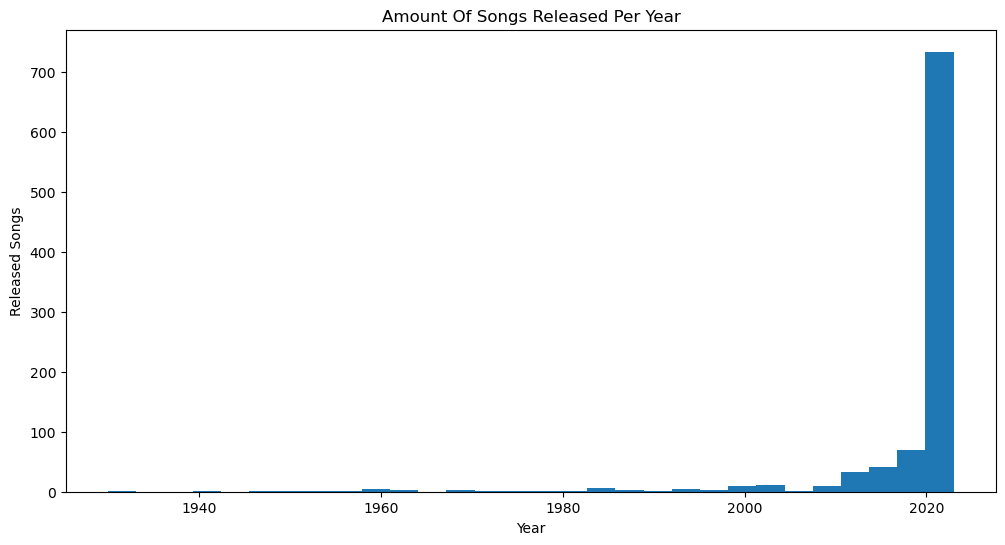

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(SP['released_year'],bins=30)
plt.xlabel("Year")
plt.ylabel("Released Songs")
plt.title("Amount Of Songs Released Per Year")
plt.show()

##### Number of songs made by an x amount of artists

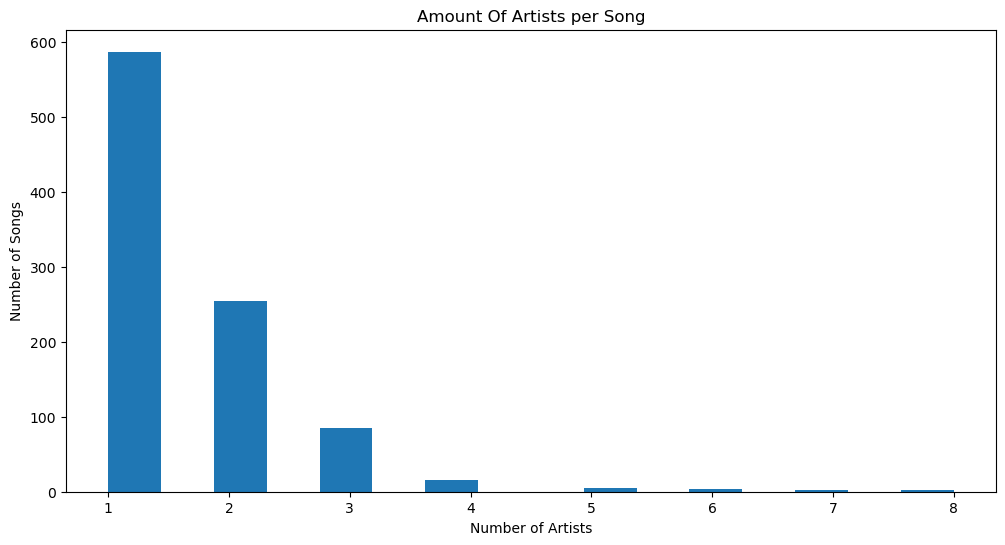

In [17]:
plt.figure(figsize=(12, 6))
plt.hist(SP['artist_count'],bins=16)
plt.xlabel("Number of Artists")
plt.ylabel("Number of Songs")
plt.title("Amount Of Artists per Song")
plt.show()

##### Top 5 most streamed songs

In [19]:
SP.sort_values(by='streams', ascending=False).head()[['track_name', 'streams']]

,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


##### Top 5 occuring Artists

In [21]:
SP['artist(s)_name'].value_counts().head()

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

##### Number of songs released per month

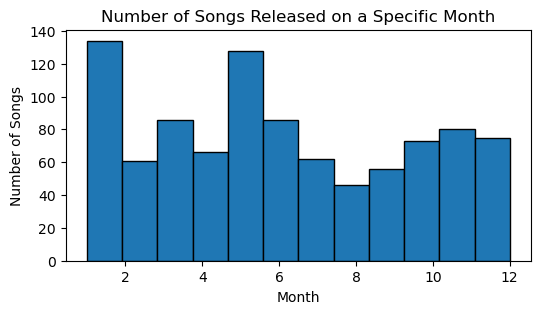

In [23]:
plt.figure(figsize=(6,3))
plt.hist(SP['released_month'],bins=12,edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Number of Songs")
plt.title("Number of Songs Released on a Specific Month")
plt.show()

##### Music attributes and their effects on streams received

(0.0, 1.0, 0.0, 1.0)

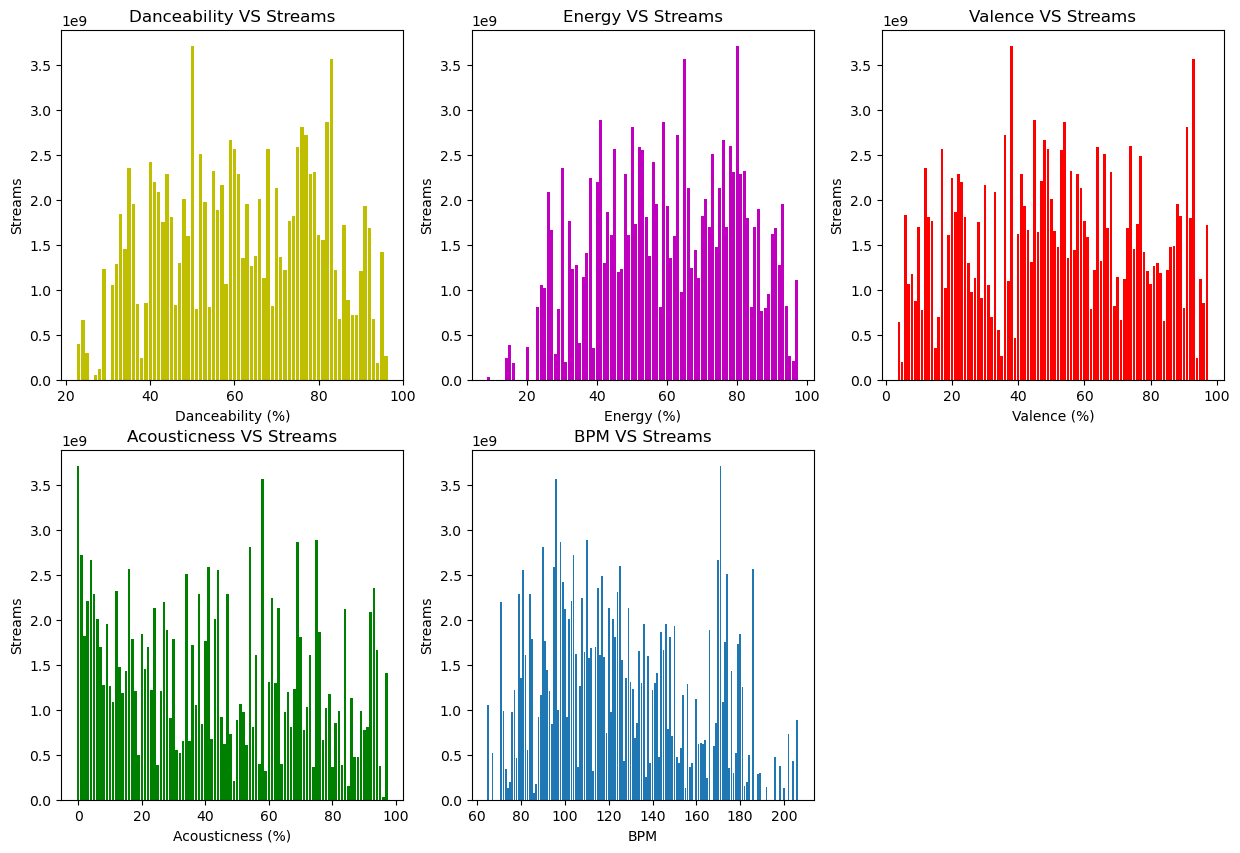

In [25]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0,0].bar(SP['danceability_%'],SP['streams'],color='y')
ax[0,0].set_title('Danceability VS Streams')
ax[0,0].set_xlabel('Danceability (%)')
ax[0,0].set_ylabel('Streams')

ax[0,1].bar(SP['energy_%'],SP['streams'],color='m')
ax[0,1].set_title('Energy VS Streams')
ax[0,1].set_xlabel('Energy (%)')
ax[0,1].set_ylabel('Streams')

ax[0,2].bar(SP['valence_%'],SP['streams'],color='r')
ax[0,2].set_title('Valence VS Streams')
ax[0,2].set_xlabel('Valence (%)')
ax[0,2].set_ylabel('Streams')

ax[1,0].bar(SP['acousticness_%'],SP['streams'],color='g')
ax[1,0].set_title('Acousticness VS Streams')
ax[1,0].set_xlabel('Acousticness (%)')
ax[1,0].set_ylabel('Streams')

ax[1,1].bar(SP['bpm'],SP['streams'])
ax[1,1].set_title('BPM VS Streams')
ax[1,1].set_xlabel('BPM')
ax[1,1].set_ylabel('Streams')

ax[1,2].axis('off')

##### Energy vs Danceability with Streams as Heatmap

Text(0, 0.5, 'Energy (%)')

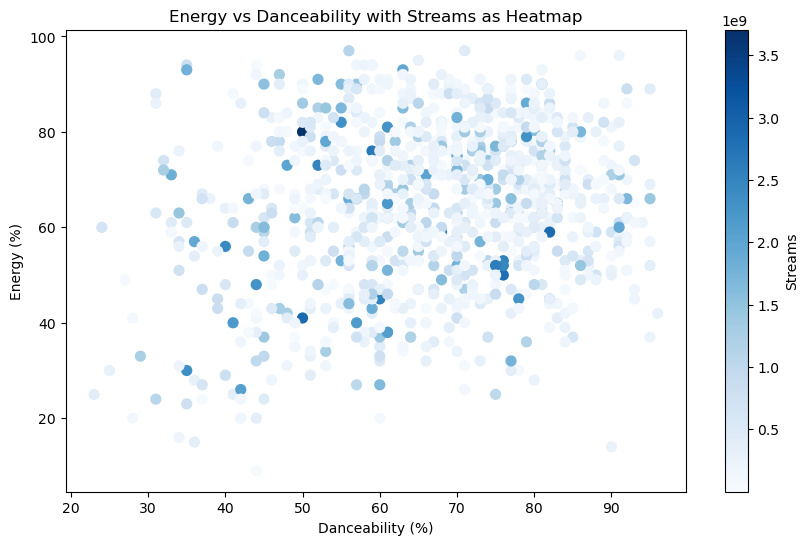

In [27]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(SP['danceability_%'], SP['energy_%'] , c=SP['streams'], cmap='Blues',s=50)

cbar = plt.colorbar(scatter)
cbar.set_label('Streams')

plt.title('Energy vs Danceability with Streams as Heatmap')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')

##### Valence vs Acousticness with Streams as Heatmap

Text(0, 0.5, 'Acousticness (%)')

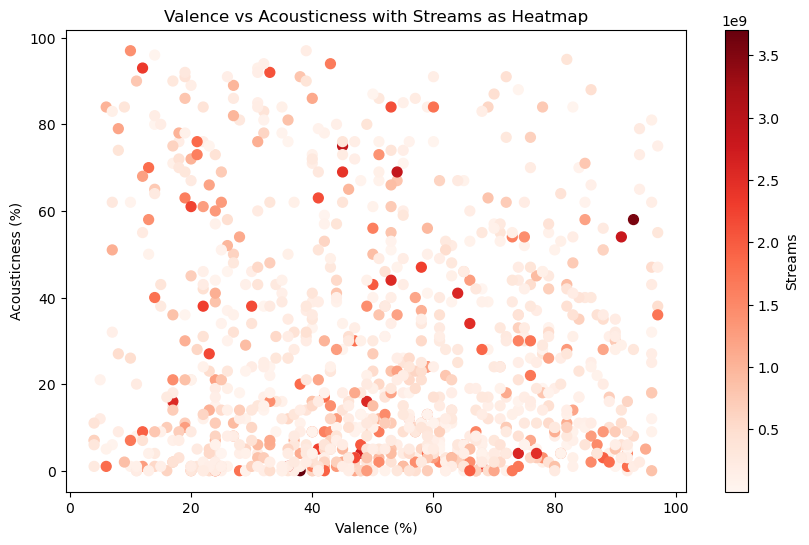

In [29]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(SP['valence_%'], SP['acousticness_%'] , c=SP['streams'], cmap='Reds',s=50)

cbar = plt.colorbar(scatter)
cbar.set_label('Streams')

plt.title('Valence vs Acousticness with Streams as Heatmap')
plt.xlabel('Valence (%)')
plt.ylabel('Acousticness (%)')

##### Songs that appear in playlists

Text(0, 0.5, 'Streams')

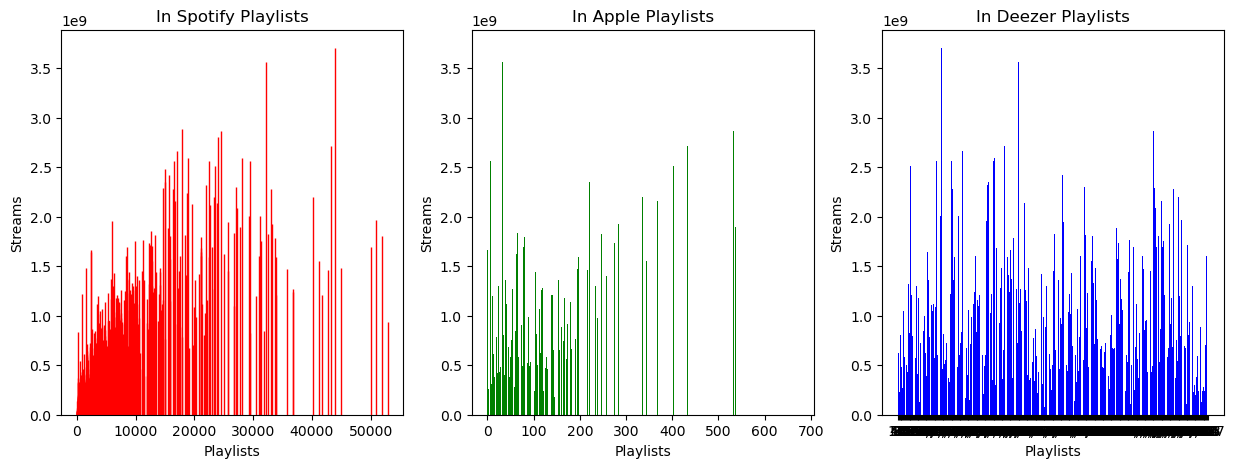

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(SP['in_spotify_playlists'],SP['streams'],edgecolor='r')
ax[0].set_title('In Spotify Playlists')
ax[0].set_xlabel('Playlists')
ax[0].set_ylabel('Streams')

ax[1].bar(SP['in_apple_playlists'],SP['streams'],color='g')
ax[1].set_title('In Apple Playlists')
ax[1].set_xlabel('Playlists')
ax[1].set_ylabel('Streams')

ax[2].bar(SP['in_deezer_playlists'],SP['streams'],color='b')
ax[2].set_title('In Deezer Playlists')
ax[2].set_xlabel('Playlists')
ax[2].set_ylabel('Streams')

##### Song in Major vs Minor keys

Text(0.5, 1.0, 'Major VS Minor Streams')

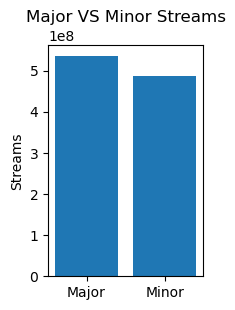

In [33]:
Majorcount = SP.loc[SP['mode']=='Major','streams'].mean()
Minorcount = SP.loc[SP['mode']=='Minor','streams'].mean()

plt.figure(figsize=(2, 3))
plt.bar(['Major','Minor'],[Majorcount,Minorcount])
plt.ylabel('Streams')
plt.title('Major VS Minor Streams')

##### Amount of time artists appear in playlists

In [35]:
ASPC = SP.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index().sort_values(by='in_spotify_playlists', ascending=False)
AAPC = SP.groupby('artist(s)_name')['in_apple_playlists'].sum().reset_index().sort_values(by='in_apple_playlists', ascending=False)
APC = pd.merge(ASPC,AAPC,on='artist(s)_name')
APC['total_playlists']=APC['in_spotify_playlists']+APC['in_apple_playlists']
APC.head()

,artist(s)_name,in_spotify_playlists,in_apple_playlists,total_playlists
0,The Weeknd,144053,1677,145730
1,Taylor Swift,132974,1796,134770
2,Ed Sheeran,128758,1448,130206
3,Harry Styles,110026,1741,111767
4,Eminem,87331,475,87806


##### Amount of time artists appear in charts

In [37]:
ASCC = SP.groupby('artist(s)_name')['in_spotify_charts'].sum().reset_index().sort_values(by='in_spotify_charts', ascending=False)
AACC = SP.groupby('artist(s)_name')['in_apple_charts'].sum().reset_index().sort_values(by='in_apple_charts', ascending=False)
AAC = pd.merge(ASCC,AACC,on='artist(s)_name')
AAC['total_charts']=AAC['in_spotify_charts']+AAC['in_apple_charts']
AAC.head()

,artist(s)_name,in_spotify_charts,in_apple_charts,total_charts
0,Taylor Swift,542,1866,2408
1,Bad Bunny,268,852,1120
2,Arctic Monkeys,190,340,530
3,Harry Styles,185,545,730
4,The Weeknd,180,1348,1528
